In [9]:
import numpy as np
import torch
from mpc_mpnet_planner import MPCMPNetPlanner
from matplotlib import pyplot as plt
from mpnet.sst_envs.utils import load_data, visualize_point, get_obs
import pickle


In [10]:
env_id = 0
traj_id = 800
obs_list = get_obs('acrobot_obs', env_id)
data = load_data('acrobot_obs', env_id, traj_id)
ref_path = data['path']
env_vox = torch.from_numpy(np.load('mpnet/sst_envs/acrobot_obs_env_vox.npy')[env_id]).unsqueeze(0).float()
## for params

n_t = 5
state_dim = 4
control_dim = 1
weights = np.ones(state_dim)*1
weights[2:] = 0.25
n_sample = 1024
n_elite = 32
t = 1e-1
dt = 2e-2

mu_t, sigma_t = 1e-1, 4e-1
t_min, t_max = 0, 5e-1

mu_u = np.zeros((n_t*control_dim))
sigma_u_diag = np.ones(n_t*control_dim)
sigma_u_diag[:] = 4
sigma_u = np.diag(sigma_u_diag)
params = {
    'n_sample': n_sample,
    'n_elite': n_elite,
    'n_t': n_t,
    'weights': weights,
    'mu_u': mu_u,
    'sigma_u': sigma_u,
    't': t,
    'dt': dt,
    
    'mu_t': np.ones(n_t) * mu_t,
    'sigma_t': np.identity(n_t)*sigma_t,
    't_min': t_min,
    't_max': t_max,
    
    'state_dim': state_dim,
    'control_dim': control_dim,
    'converge_radius': 1e-2,
    'drop_radius': 1,
    'goal_radius': 10, #np.sqrt(2),
    'max_it': 20,
    'rolling_count': n_t,
    'bk_it': 2,
    'final_goal': np.array([np.inf, np.inf, np.inf, np.inf]), #ref_path[-1],
    'mpc_mode': 'solve',
#     'mpc_mode': 'rolling',

    
}

In [11]:
%%time
mpc_mpnet = MPCMPNetPlanner(params,
                             ref_path[0], 
                             ref_path[-1],
                             env_vox,
                             system="acrobot_obs",
#                              setup="default_norm",
#                              setup="default_norm_aug",
                             setup="norm_nodiff_noaug_20step2e-2",
                             ep=5000,
                             obs_list=obs_list[env_id], verbose=True)
mpc_mpnet.mpnet.train()
# mpc_mpnet.mpnet.eval()
it = 0
while it < 1 and not mpc_mpnet.reached:
    mpc_mpnet.reset()
    for i in range(30):
        print('iteration:{}, it:{}'.format(i, it))
        mpc_mpnet.plan()
        if mpc_mpnet.reached:
            break
        it += 1
print(mpc_mpnet.costs, sum(mpc_mpnet.costs),'ref:', sum(data['cost']))

iteration:0, it:0
[78.0417611]
0.512170816257175 inf
0.496337808488003 0.512170816257175
0.47178450491546514 0.496337808488003
converged at  1
loss: [0.00461044]
iteration:1, it:1
[76.49205085]
0.08473935731220883 inf
0.07612232453394285 0.08473935731220883


/media/arclabdl1/HD1/Linjun/mpc-mpnet/mpc/systems/acrobot_vec_tv.py:141: RuntimeWarning: invalid value encountered in cos
  x2 = np.cos(goal[0] - np.pi / 2)+np.cos(goal[0] + goal[1] - np.pi / 2)
/media/arclabdl1/HD1/Linjun/mpc-mpnet/mpc/systems/acrobot_vec_tv.py:142: RuntimeWarning: invalid value encountered in sin
  y2 = np.sin(goal[0] - np.pi / 2)+np.sin(goal[0] + goal[1] - np.pi / 2)


0.07725419916983069 0.07612232453394285
0.07429934375900402 0.07612232453394285
0.08045082453338337 0.07429934375900402
0.07614150644032622 0.07429934375900402
0.07806614386307394 0.07429934375900402
0.07339466638453565 0.07429934375900402
0.07385420361486053 0.07339466638453565
0.07396266549669435 0.07339466638453565
0.07365094156784485 0.07339466638453565
0.0751504377242134 0.07339466638453565
0.07433579224900788 0.07339466638453565
0.07206838140831838 0.07339466638453565
0.07497048988640416 0.07206838140831838
0.0734397113602395 0.07206838140831838
0.07473010130665617 0.07206838140831838
0.07339838392637964 0.07206838140831838
0.07467474402979368 0.07206838140831838
0.07313400841750281 0.07206838140831838
0.0736599509419884 0.07206838140831838
loss: [0.02157572]
iteration:2, it:2
[75.93341559]
0.25539409112470957 inf
0.2022746446402979 0.25539409112470957
0.16201402141824023 0.2022746446402979
0.1569877703701017 0.16201402141824023
0.16140551047354645 0.1569877703701017
0.1608886301

0.5979671085787788 0.5979671085787788
0.5979671085787788 0.5979671085787788
loss: [0.09796711]
iteration:14, it:14
[22.76667239]
0.6946832870271038 inf
0.694325747557831 0.6946832870271038
0.6527216543227997 0.694325747557831
0.6262947147082345 0.6527216543227997
0.601917698749115 0.6262947147082345
0.5987848729375458 0.601917698749115
0.5947221980076767 0.5987848729375458
0.5910253519327218 0.5947221980076767
0.5875666396352318 0.5910253519327218
0.5862656874167056 0.5875666396352318
0.5843190156941872 0.5862656874167056
0.5844214898767233 0.5843190156941872
0.5834906480099464 0.5843190156941872
0.5836273582064373 0.5834906480099464
0.5834278021514453 0.5834906480099464
0.5832473771326756 0.5834278021514453
0.5829974664743345 0.5832473771326756
0.5829014137454053 0.5829974664743345
0.5828449331753851 0.5829014137454053
0.5827862211324432 0.5828449331753851
0.5827742811020065 0.5827862211324432
loss: [0.16710757]
iteration:15, it:15
[38.35616222]
0.9145816840747634 inf
0.75313767587068

0.41357242574625264 inf
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
0.41357242574625264 0.41357242574625264
loss: [0.41357243]
iteration:25, it:25
[17.05984086]
0.671315751668464 inf
0.663201727749696 0.671315751668464
0.6581611684104052 0.663201727749696
0.66664674520087 0.658161168

<IPython.core.display.Javascript object>


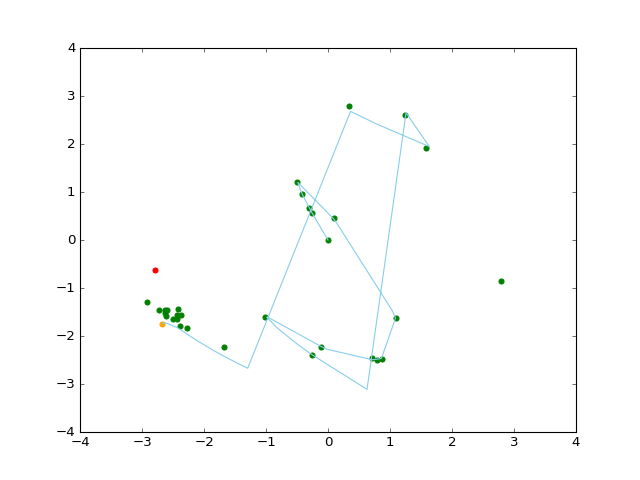

[[-2.66980878 -1.74500061 -0.45671615 -0.92741892]] [[-2.78560831 -0.62543971 -0.31195281  1.47048352]]


In [12]:
%matplotlib notebook
path = np.array(mpc_mpnet.path)

plt.plot(path[:,0], path[:,1], color='skyblue')
plt.scatter(ref_path[0,0], ref_path[0,1], color='green')
plt.scatter(ref_path[-1,0], ref_path[-1,1], color='red')
plt.scatter(mpc_mpnet.state[:,0], mpc_mpnet.state[:,1], color='orange')

samples = np.array(mpc_mpnet.samples)
plt.scatter(samples[:,0], samples[:,1], color='green')

print(mpc_mpnet.state, mpc_mpnet.goal)

In [37]:
# %matplotlib notebook
# samples = np.array(mpc_mpnet.samples)
# plt.plot(samples[:,0], samples[:,1], color='green')
# plt.scatter(ref_path[0,1], ref_path[0,1], color='orange')
# plt.scatter(ref_path[-1,1], ref_path[-1,1], color='red')

<IPython.core.display.Javascript object>


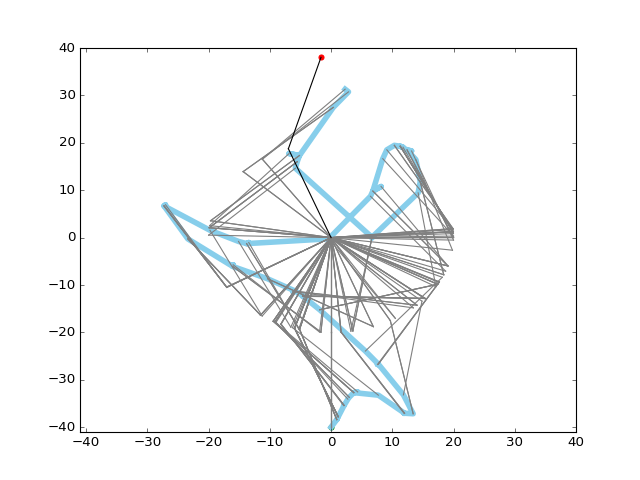

(-41, 40)

In [15]:
%matplotlib notebook

endeff = []#[[0, -40]]
node1 = []#[[0, -20]]
for p in path:
    ex1, ey1, ex2, ey2 = visualize_point(p)
    endeff.append([ex2, ey2])
    node1.append([ex1, ey1])

endeff = np.array(endeff)
node1 = np.array(node1)
x1, y1, x2, y2 = visualize_point(ref_path[-1])


plt.plot(endeff[:,0], endeff[:,1], color='skyblue', linewidth=5)
plt.scatter(endeff[:,0], endeff[:,1], color='blue', s=1)

for i in range(endeff.shape[0]):
    plt.plot([0, node1[i,0]], [0, node1[i,1]], color='gray')
    plt.plot([node1[i,0], endeff[i,0]], [node1[i,1], endeff[i,1]], color='gray')
plt.plot([0, x1], [0, y1], color='black')
plt.plot([x1, x2], [y1, y2], color='black')
    
plt.scatter(endeff[0, 0], endeff[0, 1], color='green')
plt.scatter(x2, y2, color='red')
plt.xlim(-41, 40)
plt.ylim(-41, 40)
